<a href="https://colab.research.google.com/github/kazimovmirkazim/Computer-Vision/blob/main/Face_emotion_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/bin/bash
!curl -L -o emotion-recognition-dataset.zip https://www.kaggle.com/api/v1/datasets/download/sujaykapadnis/emotion-recognition-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2027M  100 2027M    0     0  92.4M      0  0:00:21  0:00:21 --:--:--  130M


In [ ]:
!unzip '/content/emotion-recognition-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Sad/0a12a7e998fa7abde73e79ce2a74477bdc6f5dd010da05231f4c3330.jpg  
  inflating: dataset/Sad/0a1370fc7e34586d5f134694c9d1e79ed4cce9e59684077ae5061db8.png  
  inflating: dataset/Sad/0a14abb2a25753914205e88e870054918de36219552002f3144b8455.jpg  
  inflating: dataset/Sad/0a15eede4e05e13f70f6540c4167282f9a488cc318005c8693c49433.jpg  
  inflating: dataset/Sad/0a163aa46984ad37b58aa6b8175dca9b1007a3066099d18f4dda6f78.jpg  
  inflating: dataset/Sad/0a1833eb2427bd8c1ddd3b9c020c6233a3671763e21b1e08b5afa41f.jpg  
  inflating: dataset/Sad/0a19842e87935fbd2c45a7042e4bb8d1d3816476e8a6b7e8f41205d8.jpg  
  inflating: dataset/Sad/0a1d613237e9af295213c61e1c2b9d7fd211fad638c522afb9548901.jpg  
  inflating: dataset/Sad/0a1d86074a08f9bf55858cf90eaaee6f1e0362d97f08cbaa161e30e0.jpg  
  inflating: dataset/Sad/0a22b8d3b2fbcbebb6a4be7dad0a37b92983e8afe42b4d48cded4e45.jpg  
  inflating: dataset/Sad/0a285a2a07f0f8daaa0a821e30ad2e558ddc18f2589a

In [ ]:
import shutil

shutil.rmtree('/content/dataset/Ahegao')

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

In [ ]:
data_path='/content/dataset'
img_size=(224,224)
train_data=tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    subset='training',
    validation_split=0.2,
    label_mode='categorical',
    seed=42,
    image_size=img_size,
    crop_to_aspect_ratio=True
)

validation_data=tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    subset='validation',
    validation_split=0.2,
    label_mode='categorical',
    seed=42,
    image_size=img_size,
    crop_to_aspect_ratio=True
)

Found 14248 files belonging to 5 classes.
Using 11399 files for training.
Found 14248 files belonging to 5 classes.
Using 2849 files for validation.


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# tf.random.set_seed(42)

# train_datagen = ImageDataGenerator(rescale=1.255/)
# test_datagen = ImageDataGenerator(rescale=1.255/)


In [ ]:
class_names=train_data.class_names
class_names

['Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [ ]:
len(class_names)

5

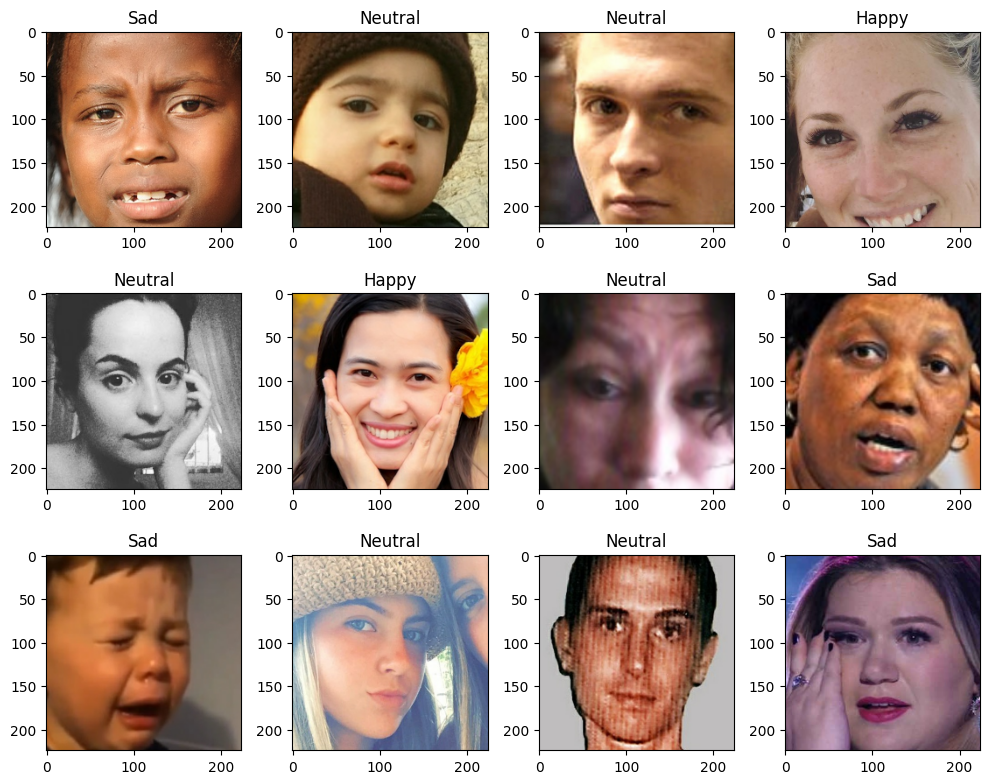

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
for image,label in train_data.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    # Convert the image tensor to a NumPy array and then to uint8 for plotting
    plt.imshow(image[i].numpy().astype('uint8'))
    # Use argmax on the label tensor to get the index of the predicted class
    plt.title(class_names[label[i].numpy().argmax()])
plt.tight_layout()
plt.show()

In [ ]:
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(
            filters=10,
            kernel_size=3,
            activation='relu',kernel_initializer='he_normal',
            kernel_regularizer= regularizers.l2(0.01),
            input_shape=(224,224,3)),
        tf.keras.layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal'),
        tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
        tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer='he_normal'),
        tf.keras.layers.Conv2D(128,3,activation='relu',kernel_initializer='he_normal'),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_normal'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64,activation='relu',kernel_initializer='he_normal'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(5,activation='softmax')

    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy','f1_score'])

In [ ]:
history = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch = len(train_data),
    validation_data=validation_data,
    validation_steps= len(validation_data)
)

Epoch 1/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 79s 180ms/step - accuracy: 0.3506 - f1_score: 0.3074 - loss: 1.7009 - val_accuracy: 0.4370 - val_f1_score: 0.3967 - val_loss: 1.4980
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 53s 131ms/step - accuracy: 0.5366 - f1_score: 0.4806 - loss: 1.2277 - val_accuracy: 0.4788 - val_f1_score: 0.4198 - val_loss: 1.3565
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 84s 136ms/step - accuracy: 0.6573 - f1_score: 0.6231 - loss: 0.9213 - val_accuracy: 0.5304 - val_f1_score: 0.4607 - val_loss: 1.3414
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 82s 135ms/step - accuracy: 0.8108 - f1_score: 0.8003 - loss: 0.5722 - val_accuracy: 0.5553 - val_f1_score: 0.5114 - val_loss: 1.3842
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 80s 129ms/step - accuracy: 0.9167 - f1_score: 0.9151 - loss: 0.3098 - val_accuracy: 0.5423 - val_f1_score: 0.5118 - val_loss: 1.7241


In [ ]:
#     base_model = tf.keras.applications.ResNet50(
#     include_top=True,
#     weights='imagenet',
#     classifier_activation='softmax',

inputs = tf.keras.layers.Input(shape=(224,224,3))
x= tf.keras.applications.resnet50.preprocess_input(inputs)
base_model = tf.keras.applications.ResNet50(include_top=False,input_tensor=x)

avg=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output= tf.keras.layers.Dense(5,activation='softmax')(avg)
model= tf.keras.Model(inputs,output)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def pred_and_plot(model,image_path):
  img= mpimg.imread(image_path)
  img= tf.image.resize(img,size=[224,224])
  img= img[tf.newaxis,...]
  pred=model.predict(img)

  plt.figure(figsize=(12,8))
  plt.subplot(1,2,1)
  plt.imshow(img[0]/255)
  plt.title(f"Prediction: {class_names[np.argmax(pred)]}")
  plt.axis(False)
  plt.subplot

In [ ]:
base_model.trainable=False

In [ ]:
initial_learning_rate=0.01
lr_schedule= tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=357,
    decay_rate= 0.96
)
early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    'emotion_detector.keras',
    save_best_only= True
)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(lr_schedule),
              metrics=["accuracy","f1_score"])

In [ ]:
history=  model.fit(train_data,validation_data=validation_data, epochs=30,callbacks=[early_stopping,checkpoint_cb])

Epoch 1/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 81s 188ms/step - accuracy: 0.4895 - f1_score: 0.4577 - loss: 1.9418 - val_accuracy: 0.5549 - val_f1_score: 0.5477 - val_loss: 1.4471
Epoch 2/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 60s 142ms/step - accuracy: 0.6246 - f1_score: 0.6160 - loss: 1.1661 - val_accuracy: 0.6188 - val_f1_score: 0.6136 - val_loss: 1.3097
Epoch 3/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 80s 136ms/step - accuracy: 0.6491 - f1_score: 0.6414 - loss: 1.1372 - val_accuracy: 0.6167 - val_f1_score: 0.6191 - val_loss: 1.3009
Epoch 4/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 81s 134ms/step - accuracy: 0.6774 - f1_score: 0.6712 - loss: 0.9910 - val_accuracy: 0.6515 - val_f1_score: 0.6498 - val_loss: 1.1694
Epoch 5/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 48s 133ms/step - accuracy: 0.7044 - f1_score: 0.7033 - loss: 0.9015 - val_accuracy: 0.6511 - val_f1_score: 0.6536 - val_loss: 1.1529
Epoch 6/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 80s 127ms/step - accuracy: 0.7044 - f1_score: 0.6985 - loss: 0.8718 - val_accuracy: 0.5869 - va